In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data['frame']

In [2]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Um olhar geral sobre as variaveis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


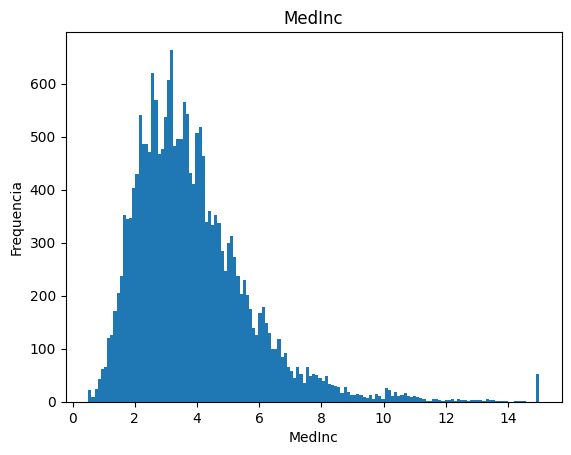

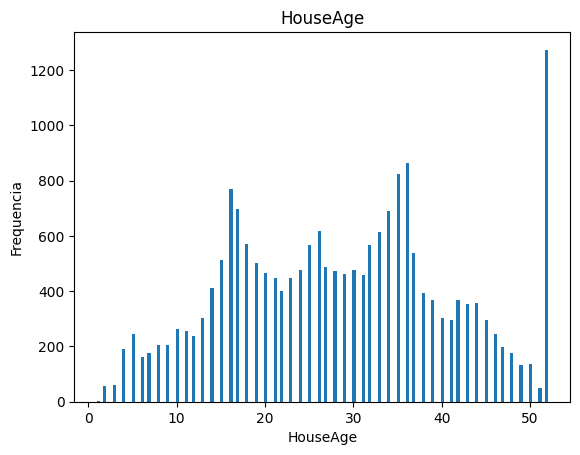

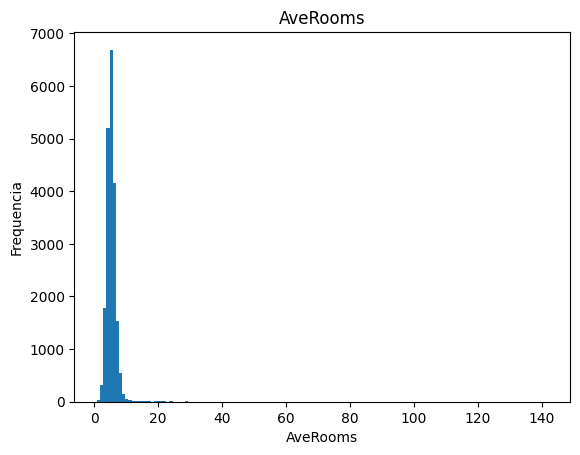

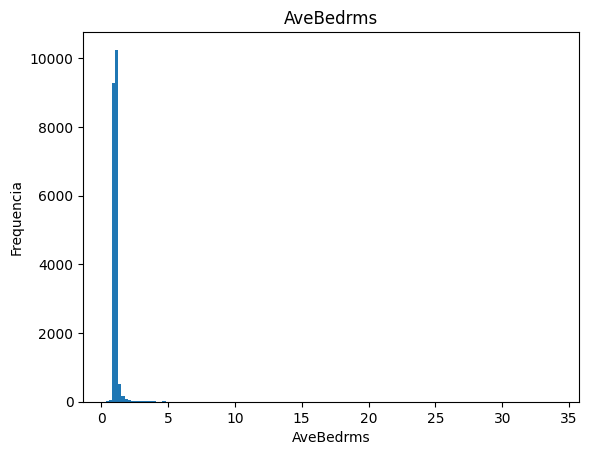

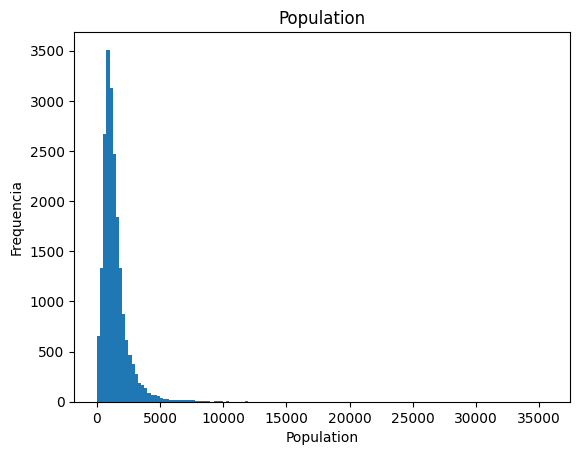

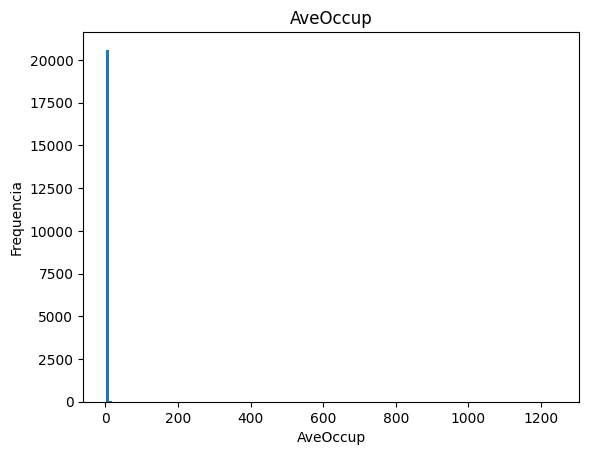

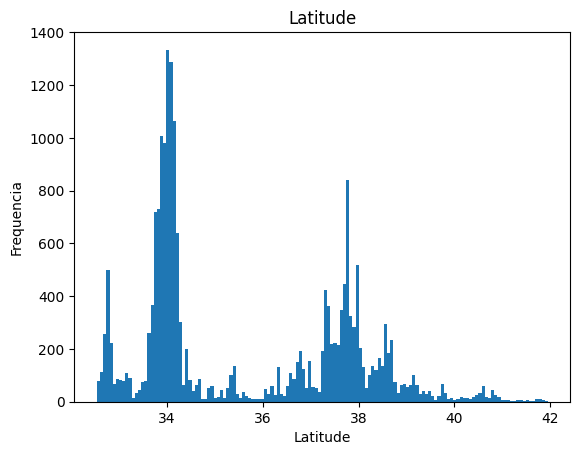

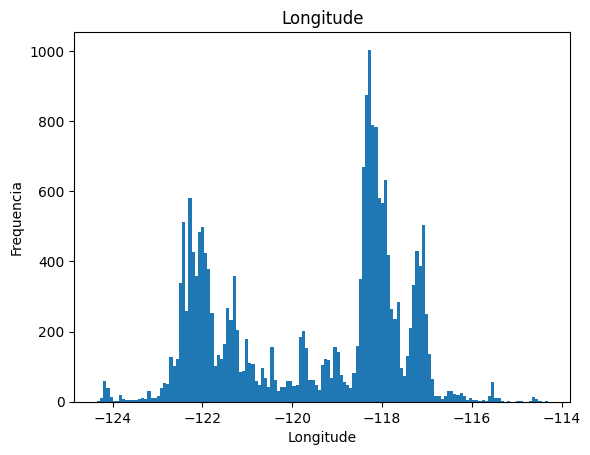

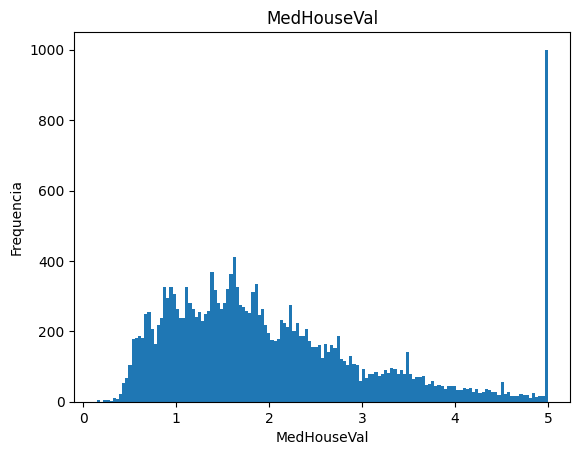

In [13]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = df.shape[0]
bins = int(np.sqrt(num_rows))

def plot_column(df, column):
    plt.figure()
    df[column].plot.hist(bins=bins)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequencia')
    plt.show()

for column in df.columns:
    plot_column(df, column)


# Analisando cada uma das features

## MedInc

In [12]:
df['MedInc'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

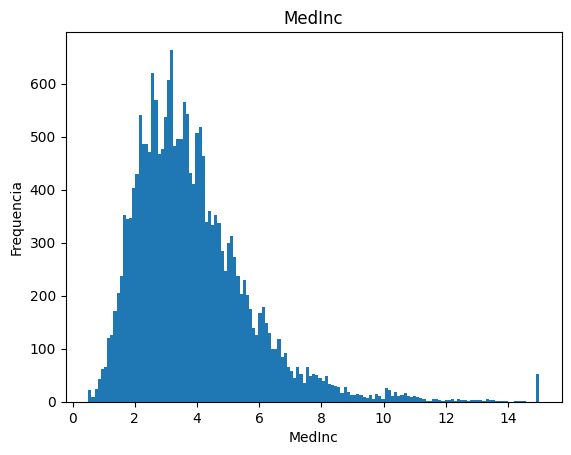

In [14]:
plot_column(df, 'MedInc')

Observações: tem algo estranho lá no 15.

In [18]:
linhas_estranhas = df['MedInc'] > 15
df[linhas_estranhas]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.50000
4352,15.0001,37.0,8.659574,1.425532,100.0,2.127660,34.10,-118.37,5.00001
4604,15.0001,52.0,8.444954,1.100917,693.0,3.178899,34.06,-118.33,5.00001
4605,15.0001,52.0,8.483019,0.962264,813.0,3.067925,34.07,-118.33,5.00001
4606,15.0001,52.0,9.204969,1.062112,531.0,3.298137,34.07,-118.33,5.00001
4626,15.0001,52.0,7.958333,0.833333,457.0,3.808333,34.06,-118.32,5.00001
4678,15.0001,52.0,8.780612,0.994898,688.0,3.510204,34.08,-118.34,5.00001
5242,15.0001,32.0,8.002869,1.080344,1567.0,2.248207,34.11,-118.40,5.00001
5247,15.0001,36.0,9.368263,1.173653,862.0,2.580838,34.09,-118.44,5.00001
5248,15.0001,46.0,8.365591,0.967742,238.0,2.559140,34.08,-118.43,5.00001


In [19]:
linhas_estranhas.value_counts()

False    20591
True        49
Name: MedInc, dtype: int64

Decisão: remover as linhas associadas à renda maior que 15 unidades.

Razão: trata-se de **saturação de valores**, logo não são precisos.

In [20]:
linhas_normais = df['MedInc'] <= 15
linhas_normais.value_counts()

True     20591
False       49
Name: MedInc, dtype: int64

In [21]:
df = df[linhas_normais]

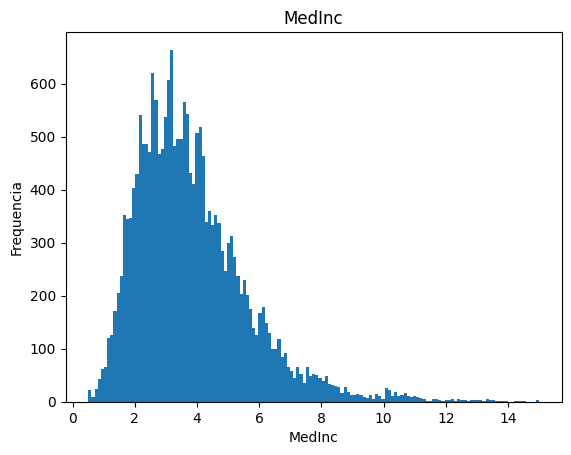

In [23]:
plot_column(df, 'MedInc')

## HouseAge

In [25]:
df['HouseAge'].describe()

count    20591.00000
mean        28.61386
std         12.57557
min          1.00000
25%         18.00000
50%         29.00000
75%         37.00000
max         52.00000
Name: HouseAge, dtype: float64

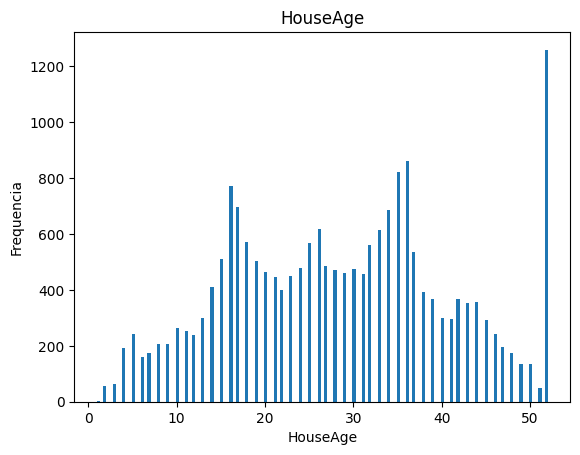

In [27]:
plot_column(df, 'HouseAge')

Aquela alta frequencia no 52 provavelmente é *saturação*. 

Decisão: vamos remover, pois estamos usando um modelo linear mais pra frente

In [28]:
linhas_normais = df['HouseAge'] <= 50
linhas_normais.value_counts()

True     19284
False     1307
Name: HouseAge, dtype: int64

In [29]:
df = df[linhas_normais]

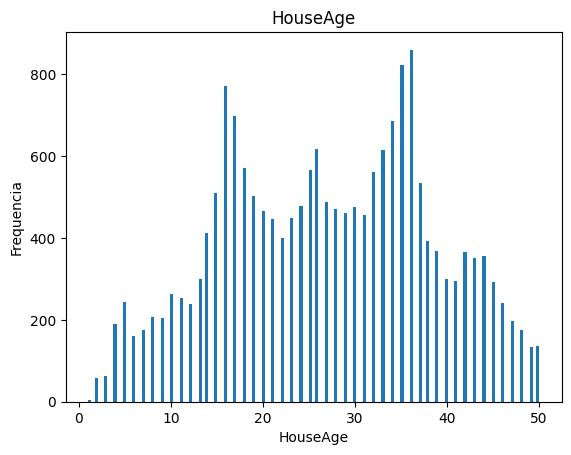

In [30]:
plot_column(df, 'HouseAge')

## AveRooms

In [31]:
df['AveRooms'].describe()

count    19284.000000
mean         5.445474
std          2.525020
min          0.846154
25%          4.454048
50%          5.245136
75%          6.060887
max        141.909091
Name: AveRooms, dtype: float64

Max value muito muito suspeito! Onde que um distrito tem numero médio de comodos na casa dos 140?

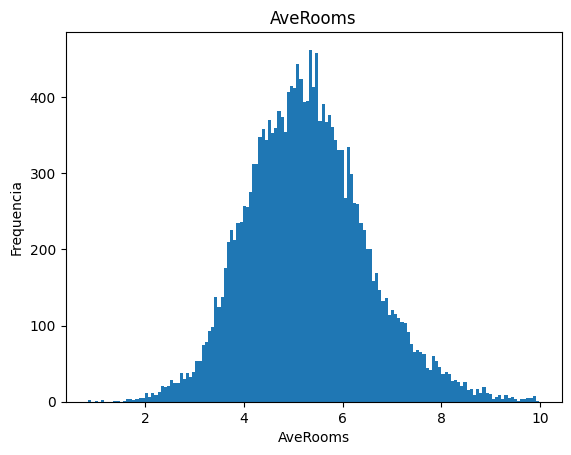

In [38]:
linhas_normais = df['AveRooms'] < 10
plot_column(df[linhas_normais], 'AveRooms')

In [39]:
linhas_normais.value_counts()

True     19064
False      220
Name: AveRooms, dtype: int64

Decisão: eliminar distritos com AveRooms > 10

Razão: São distritos meio anormais do ponto de vista de numero de comodos

In [40]:
df = df[linhas_normais]